# Goal: Data Cleaning

In [24]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-07\data\lev-07_merged.parquet"

pdf = pl.read_parquet(path)
pdf.collect_schema()

Schema([('Survey_Name', String),
        ('Year', String),
        ('FSU_Serial_No', String),
        ('Sector', String),
        ('State', String),
        ('NSS_Region', String),
        ('District', String),
        ('Stratum', String),
        ('Sub_stratum', String),
        ('Panel', String),
        ('Sub_sample', String),
        ('FOD_Sub_Region', String),
        ('Sample_SU_No', String),
        ('Sample_Sub_Division_No', String),
        ('Second_Stage_Stratum_No', String),
        ('Sample_Household_No', String),
        ('Questionnaire_No', String),
        ('Level', String),
        ('Kerosene_ration_card', String),
        ('LPG_subsidy_received', String),
        ('LPG_subsidized_cylinders', String),
        ('Free_electricity', String),
        ('Any_member_attended_school', String),
        ('Num_govt_school_attended', Float64),
        ('Num_private_school_attended', Float64),
        ('Free_textbooks_received', String),
        ('Total_textbooks', Float64),
       

In [83]:
pdf = pdf.filter(
    pl.col('State') == '23'
)

pdf['State'].unique()

State
str
"""23"""


In [84]:
lev_07_food = [
    'Free_other_items_received',
    'Total_other_items',
    'Fee_waiver_received',
    'Num_fee_waiver_received',
]

lev_07_health = [
    'Ayushman_beneficiary',
    'Num_ayushman_beneficiaries',
    'Hospitalization_case',
    'Medical_benefit_received',
    'Num_medical_beneficiaries',
    'Medical_benefit_amount',
]

lev_07_digital = [
    'Online_purchase_fuel_light',
    'Online_purchase_toilet_articles',
    'Online_purchase_education',
    'Online_purchase_medicine',
    'Online_purchase_services',
    'Multiplier'
]

lev_07_occupation = [
    'Any_member_attended_school',
    'Num_govt_school_attended',
    'Num_private_school_attended',
    'Free_textbooks_received',
    'Total_textbooks',
    'Free_stationery_received',
    'Total_stationery',
    'Free_school_bag_received',
    'Total_school_bags',
]

lev_07_govt = [
    'Kerosene_ration_card',
    'LPG_subsidy_received',
    'LPG_subsidized_cylinders',
    'Free_electricity',
]

In [85]:
lev_07_cols = (
    lev_07_food
    + lev_07_health
    + lev_07_digital
    + lev_07_occupation
    + lev_07_govt
)

pdf = pdf[lev_07_cols]

In [86]:
pdf

Free_other_items_received,Total_other_items,Fee_waiver_received,Num_fee_waiver_received,Ayushman_beneficiary,Num_ayushman_beneficiaries,Hospitalization_case,Medical_benefit_received,Num_medical_beneficiaries,Medical_benefit_amount,Online_purchase_fuel_light,Online_purchase_toilet_articles,Online_purchase_education,Online_purchase_medicine,Online_purchase_services,Multiplier,Any_member_attended_school,Num_govt_school_attended,Num_private_school_attended,Free_textbooks_received,Total_textbooks,Free_stationery_received,Total_stationery,Free_school_bag_received,Total_school_bags,Kerosene_ration_card,LPG_subsidy_received,LPG_subsidized_cylinders,Free_electricity
str,f64,str,f64,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,i64,str,f64,f64,str,f64,str,f64,str,f64,str,str,str,str
"""""",null,"""2""",null,"""2""",null,"""1""","""2""",null,null,null,null,null,null,1.0,58558,"""1""",2.0,null,"""""",null,"""""",null,"""""",null,"""2""","""2""","""""","""2"""
"""""",null,"""2""",null,"""1""",1.0,"""1""","""1""",1.0,60000.0,null,null,null,null,null,58558,"""1""",0.0,1.0,"""""",null,"""""",null,"""""",null,"""2""","""2""","""""","""2"""
"""""",null,"""1""",1.0,"""2""",null,"""1""","""2""",null,null,null,null,null,null,1.0,58558,"""1""",null,1.0,"""""",null,"""""",null,"""""",null,"""2""","""2""","""""","""2"""
"""""",null,"""1""",1.0,"""2""",null,"""1""","""2""",null,null,null,null,null,null,null,58558,"""1""",null,2.0,"""""",null,"""""",null,"""""",null,"""2""","""2""","""""","""2"""
"""""",null,"""1""",1.0,"""1""",1.0,"""3""","""1""",1.0,120000.0,null,null,null,null,null,58558,"""1""",1.0,2.0,"""1""",6.0,"""""",null,"""""",null,"""2""","""2""","""""","""2"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""""",null,"""2""",null,"""1""",4.0,"""4""","""""",null,null,null,null,null,null,1.0,173023,"""1""",1.0,0.0,"""1""",6.0,"""""",null,"""""",null,"""2""","""1""","""2""","""1"""
"""""",null,"""2""",null,"""2""",null,"""4""","""""",null,null,null,null,null,null,1.0,173023,"""1""",0.0,1.0,"""""",null,"""""",null,"""""",null,"""2""","""1""","""2""","""1"""
"""""",null,"""2""",null,"""1""",3.0,"""1""","""2""",null,null,null,null,null,null,1.0,173023,"""1""",1.0,0.0,"""1""",6.0,"""""",null,"""""",null,"""2""","""1""","""1""","""1"""


In [87]:
pdf = pdf.with_columns(
    [pl.col(col).cast(pl.Int32, strict=False) for col in lev_07_cols]
)
pdf.schema

Schema([('Free_other_items_received', Int32),
        ('Total_other_items', Int32),
        ('Fee_waiver_received', Int32),
        ('Num_fee_waiver_received', Int32),
        ('Ayushman_beneficiary', Int32),
        ('Num_ayushman_beneficiaries', Int32),
        ('Hospitalization_case', Int32),
        ('Medical_benefit_received', Int32),
        ('Num_medical_beneficiaries', Int32),
        ('Medical_benefit_amount', Int32),
        ('Online_purchase_fuel_light', Int32),
        ('Online_purchase_toilet_articles', Int32),
        ('Online_purchase_education', Int32),
        ('Online_purchase_medicine', Int32),
        ('Online_purchase_services', Int32),
        ('Multiplier', Int32),
        ('Any_member_attended_school', Int32),
        ('Num_govt_school_attended', Int32),
        ('Num_private_school_attended', Int32),
        ('Free_textbooks_received', Int32),
        ('Total_textbooks', Int32),
        ('Free_stationery_received', Int32),
        ('Total_stationery', Int32),
 

In [111]:
pdf['Free_other_items_received'].null_count()

27136

In [112]:
pdf.shape

(28210, 29)

In [2]:
whole_valid_points = 13_429
mp_total_record = 28_210

(whole_valid_points / mp_total_record) * 100

47.603686635944705

In [109]:
print("Percentage of null values ")
for col in pdf.columns:
    null_percentage = (pdf[col].null_count() / pdf.shape[0]) * 100
    print(f"{col} ---> {null_percentage:.2f}%")

Percentage of null values 
Free_other_items_received ---> 96.19%
Total_other_items ---> 96.19%
Fee_waiver_received ---> 44.10%
Num_fee_waiver_received ---> 90.91%
Ayushman_beneficiary ---> 0.00%
Num_ayushman_beneficiaries ---> 55.31%
Hospitalization_case ---> 0.00%
Medical_benefit_received ---> 86.09%
Num_medical_beneficiaries ---> 98.48%
Medical_benefit_amount ---> 98.48%
Online_purchase_fuel_light ---> 83.91%
Online_purchase_toilet_articles ---> 97.72%
Online_purchase_education ---> 98.88%
Online_purchase_medicine ---> 98.80%
Online_purchase_services ---> 65.03%
Multiplier ---> 0.00%
Any_member_attended_school ---> 0.00%
Num_govt_school_attended ---> 58.36%
Num_private_school_attended ---> 56.59%
Free_textbooks_received ---> 74.19%
Total_textbooks ---> 74.19%
Free_stationery_received ---> 99.65%
Total_stationery ---> 99.65%
Free_school_bag_received ---> 99.77%
Total_school_bags ---> 99.77%
Kerosene_ration_card ---> 0.00%
LPG_subsidy_received ---> 0.00%
LPG_subsidized_cylinders ---> 7

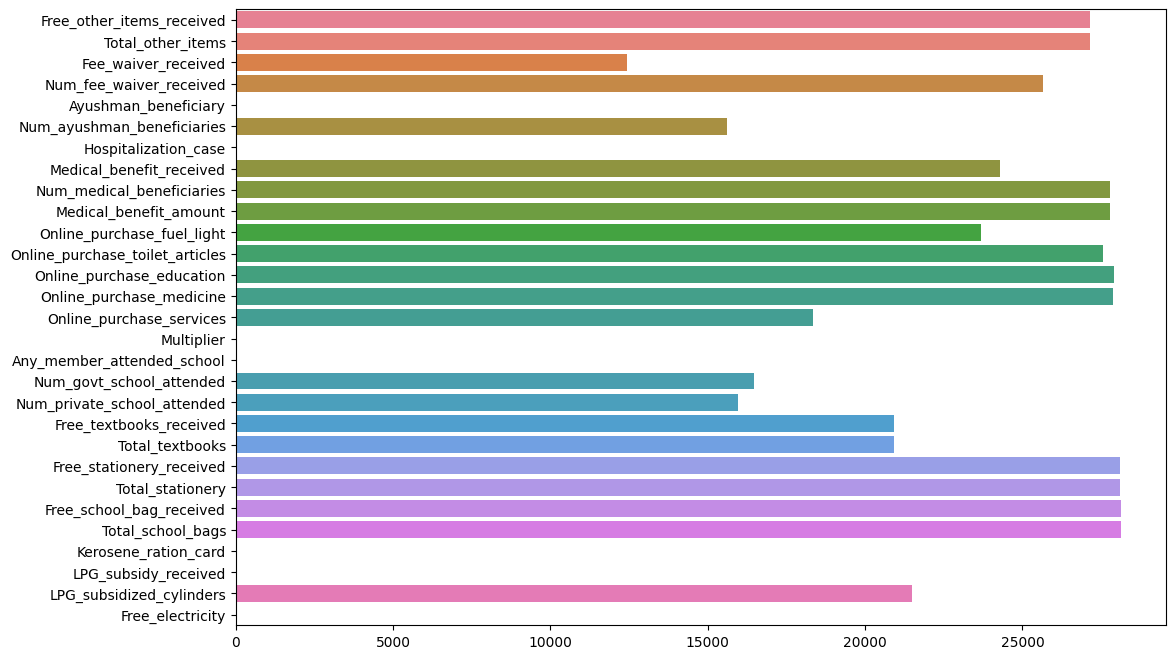

In [88]:
plt.figure(figsize=(12, 8))
sns.barplot(pdf.null_count().to_pandas(), orient='h')
plt.show()

In [89]:
(pdf.null_count() / pdf.shape[0]).to_pandas().T

,0
Free_other_items_received,0.961928
Total_other_items,0.961928
Fee_waiver_received,0.441049
Num_fee_waiver_received,0.909110
Ayushman_beneficiary,0.000000
Num_ayushman_beneficiaries,0.553137
Hospitalization_case,0.000000
Medical_benefit_received,0.860900
Num_medical_beneficiaries,0.984828
Medical_benefit_amount,0.984828


In [ ]:
def check_unique(col):
    print(f"{col} contains : {pdf[col].n_unique()}")
    display(pdf[col].unique())
    display(f" This {col} have the skewness {pdf[col].skew()}")
    print(f"{'='*50}")

In [34]:
def plot_hist(col):
    sns.histplot(pdf[col])

In [ ]:
for col in pdf.columns:
    check_unique(col)

Free_other_items_received contains : 2


' This Free_other_items_received have the skewness nan'

Total_other_items contains : 12


' This Total_other_items have the skewness 3.764757423257878'

Fee_waiver_received contains : 3


' This Fee_waiver_received have the skewness -1.8286469236494889'

Num_fee_waiver_received contains : 8


' This Num_fee_waiver_received have the skewness 1.4888949736673076'

Ayushman_beneficiary contains : 2


' This Ayushman_beneficiary have the skewness -0.21375929394047077'

Num_ayushman_beneficiaries contains : 14


' This Num_ayushman_beneficiaries have the skewness 0.9678673015673415'

Hospitalization_case contains : 4


' This Hospitalization_case have the skewness -2.419350769363671'

Medical_benefit_received contains : 3


' This Medical_benefit_received have the skewness -2.5081168091530417'

Num_medical_beneficiaries contains : 3


' This Num_medical_beneficiaries have the skewness 4.063093974628655'

Medical_benefit_amount contains : 108


' This Medical_benefit_amount have the skewness 2.5556935060690127'

Online_purchase_fuel_light contains : 2


' This Online_purchase_fuel_light have the skewness nan'

Online_purchase_toilet_articles contains : 2


' This Online_purchase_toilet_articles have the skewness nan'

Online_purchase_education contains : 2


' This Online_purchase_education have the skewness nan'

Online_purchase_medicine contains : 2


' This Online_purchase_medicine have the skewness nan'

Online_purchase_services contains : 2


' This Online_purchase_services have the skewness nan'

Multiplier contains : 1421


' This Multiplier have the skewness 3.7337633247776814'

Any_member_attended_school contains : 2


' This Any_member_attended_school have the skewness 0.2374591127427218'

Num_govt_school_attended contains : 9


' This Num_govt_school_attended have the skewness 0.6774887152585232'

Num_private_school_attended contains : 10


' This Num_private_school_attended have the skewness 0.9713694762987436'

Free_textbooks_received contains : 2


' This Free_textbooks_received have the skewness nan'

Total_textbooks contains : 37


' This Total_textbooks have the skewness 1.3357892926425128'

Free_stationery_received contains : 2


' This Free_stationery_received have the skewness nan'

Total_stationery contains : 17


' This Total_stationery have the skewness 1.7647672341711975'

Free_school_bag_received contains : 2


' This Free_school_bag_received have the skewness nan'

Total_school_bags contains : 5


' This Total_school_bags have the skewness 0.8659742077927407'

Kerosene_ration_card contains : 2


' This Kerosene_ration_card have the skewness -118.7518423895051'

LPG_subsidy_received contains : 2


' This LPG_subsidy_received have the skewness -1.229072922868516'

LPG_subsidized_cylinders contains : 4


' This LPG_subsidized_cylinders have the skewness 1.2044016876252135'

Free_electricity contains : 2


' This Free_electricity have the skewness -0.6380540742363424'

In [38]:
cols = pdf.columns

# Food

In [ ]:
pdf[lev_07_food].null_count()

In [40]:
pdf[lev_07_food]

Free_other_items_received,Total_other_items,Fee_waiver_received,Num_fee_waiver_received
i32,i32,i32,i32
null,null,2,null
null,null,2,null
null,null,1,1
null,null,1,1
null,null,1,1
…,…,…,…
null,null,2,null
null,null,2,null
null,null,2,null


In [105]:
for col in lev_07_food:
    null_percentage = (pdf[col].null_count() / pdf.shape[0]) * 100
    print(f"Percentage of null values in ---> {col}: {null_percentage:.2f}%")

Percentage of null values in ---> Free_other_items_received: 96.19%
Percentage of null values in ---> Total_other_items: 96.19%
Percentage of null values in ---> Fee_waiver_received: 44.10%
Percentage of null values in ---> Num_fee_waiver_received: 90.91%


In [42]:
pdf[lev_07_food].describe()

statistic,Free_other_items_received,Total_other_items,Fee_waiver_received,Num_fee_waiver_received
str,f64,f64,f64,f64
"""count""",1074.0,1074.0,15768.0,2564.0
"""null_count""",27136.0,27136.0,12442.0,25646.0
"""mean""",1.0,2.405959,1.837392,1.765991
"""std""",0.0,1.830416,0.369019,0.860907
"""min""",1.0,1.0,1.0,1.0
"""25%""",1.0,1.0,2.0,1.0
"""50%""",1.0,2.0,2.0,2.0
"""75%""",1.0,3.0,2.0,2.0
"""max""",1.0,18.0,2.0,9.0


In [ ]:
# It means rest are 0 
display(pdf['Free_other_items_received'].value_counts())

# So I fill with the zero values
pdf = pdf.with_columns(
    pl.col('Free_other_items_received').fill_null(strategy='zero')
)

Free_other_items_received,count
i32,u32
0,27136
1,1074


Free_other_items_received,count
i32,u32
0,27136
1,1074


In [49]:
# We notice, if the user don't get any thing 
# it simple mean by zero 
# So I fill everything withe the zero values

for col in lev_07_food:
    pdf = pdf.with_columns(
        pl.col(col).fill_null(strategy='zero')
    )

In [93]:
for col in lev_07_food:
    null_percentage = (pdf[col].null_count() / pdf.shape[0]) * 100
    print(f"Percentage of null values in {col}: {null_percentage:.2f}%")

Percentage of null values in Free_other_items_received: 96.19%
Percentage of null values in Total_other_items: 96.19%
Percentage of null values in Fee_waiver_received: 44.10%
Percentage of null values in Num_fee_waiver_received: 90.91%


In [92]:
pdf[lev_07_food].null_count() / pdf.shape[0]

Free_other_items_received,Total_other_items,Fee_waiver_received,Num_fee_waiver_received
f64,f64,f64,f64
0.961928,0.961928,0.441049,0.90911


In [90]:
pdf[lev_07_food].null_count()

Free_other_items_received,Total_other_items,Fee_waiver_received,Num_fee_waiver_received
u32,u32,u32,u32
27136,27136,12442,25646


# Health

In [51]:
pdf[lev_07_health]

Ayushman_beneficiary,Num_ayushman_beneficiaries,Hospitalization_case,Medical_benefit_received,Num_medical_beneficiaries,Medical_benefit_amount
i32,i32,i32,i32,i32,i32
2,null,1,2,null,null
1,1,1,1,1,60000
2,null,1,2,null,null
2,null,1,2,null,null
1,1,3,1,1,120000
…,…,…,…,…,…
1,4,4,null,null,null
2,null,4,null,null,null
1,3,1,2,null,null


In [104]:
for col in lev_07_health:
    null_percentage = (pdf[col].null_count() / pdf.shape[0]) * 100
    print(f"Percentage of null values in ---> {col}: {null_percentage:.2f}%")

Percentage of null values in ---> Ayushman_beneficiary: 0.00%
Percentage of null values in ---> Num_ayushman_beneficiaries: 55.31%
Percentage of null values in ---> Hospitalization_case: 0.00%
Percentage of null values in ---> Medical_benefit_received: 86.09%
Percentage of null values in ---> Num_medical_beneficiaries: 98.48%
Percentage of null values in ---> Medical_benefit_amount: 98.48%


In [56]:
pdf[lev_07_health].null_count() / pdf.shape[0]

Ayushman_beneficiary,Num_ayushman_beneficiaries,Hospitalization_case,Medical_benefit_received,Num_medical_beneficiaries,Medical_benefit_amount
f64,f64,f64,f64,f64,f64
0.0,0.553137,0.0,0.8609,0.984828,0.984828


In [58]:
pdf[lev_07_health].null_count()

Ayushman_beneficiary,Num_ayushman_beneficiaries,Hospitalization_case,Medical_benefit_received,Num_medical_beneficiaries,Medical_benefit_amount
u32,u32,u32,u32,u32,u32
0,15604,0,0,27782,27782


In [ ]:
# Here 2 means the no so i fill with the 2 
pdf = pdf.with_columns(
    pl.col('Medical_benefit_received').fill_null(value=2)
)

In [67]:
# This is the simple int so i fill with the mean
# But due to the mean came in float i fill with the forward filling
# it not affect the data structure because it is less than 1
# But again it not fill the values so i fill with most frequent value

In [68]:
pdf = pdf.with_columns(
    pl.col('Num_ayushman_beneficiaries').fill_null(value=3)
)

pdf = pdf.with_columns(
    pl.col('Medical_benefit_amount').fill_null(strategy='one')
)

pdf = pdf.with_columns(
    pl.col('Num_medical_beneficiaries').fill_null(value=30_000)
)

In [66]:
pdf[lev_07_health].describe()

statistic,Ayushman_beneficiary,Num_ayushman_beneficiaries,Hospitalization_case,Medical_benefit_received,Num_medical_beneficiaries,Medical_benefit_amount
str,f64,f64,f64,f64,f64,f64
"""count""",28210.0,28210.0,28210.0,28210.0,28210.0,28210.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.553137,3.067706,3.668274,1.984828,2.13481,32054.302481
"""std""",0.497177,1.080356,0.868661,0.122239,178.60954,33261.962187
"""min""",1.0,1.0,1.0,1.0,1.0,0.0
"""25%""",1.0,3.0,4.0,2.0,1.0,10500.0
"""50%""",2.0,3.0,4.0,2.0,1.0,25000.0
"""75%""",2.0,3.0,4.0,2.0,1.0,40500.0
"""max""",2.0,14.0,4.0,2.0,30000.0,250000.0


# Digital

In [69]:
pdf[lev_07_digital]

Online_purchase_fuel_light,Online_purchase_toilet_articles,Online_purchase_education,Online_purchase_medicine,Online_purchase_services,Multiplier
i32,i32,i32,i32,i32,i32
null,null,null,null,1,58558
null,null,null,null,null,58558
null,null,null,null,1,58558
null,null,null,null,null,58558
null,null,null,null,null,58558
…,…,…,…,…,…
null,null,null,null,1,173023
null,null,null,null,1,173023
null,null,null,null,1,173023


In [ ]:
for col in lev_07_digital:
    null_percentage = (pdf[col].null_count() / pdf.shape[0]) * 100
    print(f"Percentage of null values in ---> {col}: {null_percentage:.2f}%")

Percentage of null values in Online_purchase_fuel_light: 83.91%
Percentage of null values in Online_purchase_toilet_articles: 97.72%
Percentage of null values in Online_purchase_education: 98.88%
Percentage of null values in Online_purchase_medicine: 98.80%
Percentage of null values in Online_purchase_services: 65.03%
Percentage of null values in Multiplier: 0.00%


# Occupation

In [ ]:
for col in lev_07_occupation:
    null_percentage = (pdf[col].null_count() / pdf.shape[0]) * 100
    print(f"Percentage of null values in ---> {col}: {null_percentage:.2f}%")

Percentage of null values in Any_member_attended_school: 0.00%
Percentage of null values in Num_govt_school_attended: 58.36%
Percentage of null values in Num_private_school_attended: 56.59%
Percentage of null values in Free_textbooks_received: 74.19%
Percentage of null values in Total_textbooks: 74.19%
Percentage of null values in Free_stationery_received: 99.65%
Percentage of null values in Total_stationery: 99.65%
Percentage of null values in Free_school_bag_received: 99.77%
Percentage of null values in Total_school_bags: 99.77%


# Govt

In [99]:
for col in lev_07_govt:
    null_percentage = (pdf[col].null_count() / pdf.shape[0]) * 100
    print(f"Percentage of null values in ---> {col}: {null_percentage:.2f}%")

Percentage of null values in ---> Kerosene_ration_card: 0.00%
Percentage of null values in ---> LPG_subsidy_received: 0.00%
Percentage of null values in ---> LPG_subsidized_cylinders: 76.18%
Percentage of null values in ---> Free_electricity: 0.00%


# Save

In [ ]:
pdf.null_count()

In [ ]:
e 
pdf.write_csv(r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-05\data2\lev_05_mp_clean.csv")
pdf.write_parquet(r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-05\data2\lev_05_mp_clean.parquet", compression="zstd")
print('Saved 🙌')

Saved 🙌
